In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/s0203301/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
model = YOLO("yolov8n.pt")

In [4]:
frame1 = cv2.imread("frame1.jpeg")
frame2 = cv2.imread("frame2.jpeg")

# Convert BGR to RGB for plotting
frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

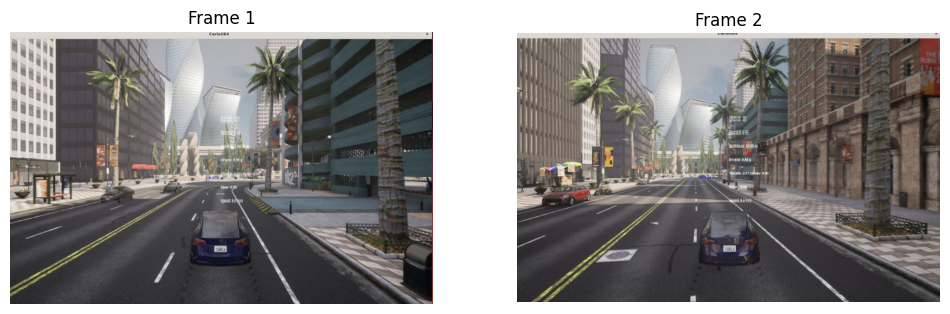


0: 640x640 5 cars, 17.5ms
1: 640x640 1 car, 17.5ms
Speed: 2.3ms preprocess, 17.5ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

--- Frame 1 ---
Track ID 2: Class 0, BBox [542, 539, 730, 707], Confidence 1.00
Track ID 2: Class 0, BBox [460, 450, 513, 489], Confidence 2.00
Track ID 2: Class 0, BBox [273, 467, 379, 520], Confidence 3.00
Track ID 2: Class 0, BBox [331, 446, 395, 466], Confidence 4.00
Track ID 2: Class 0, BBox [594, 435, 638, 453], Confidence 5.00

--- Frame 2 ---
Track ID 2: Class 0, BBox [547, 536, 734, 703], Confidence 1.00


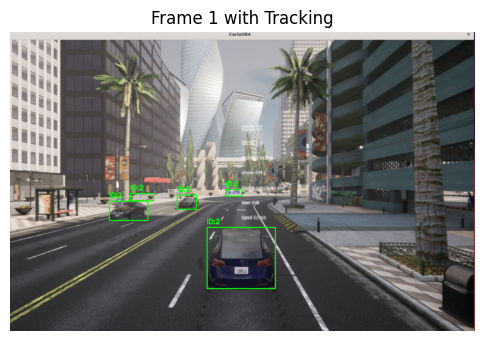

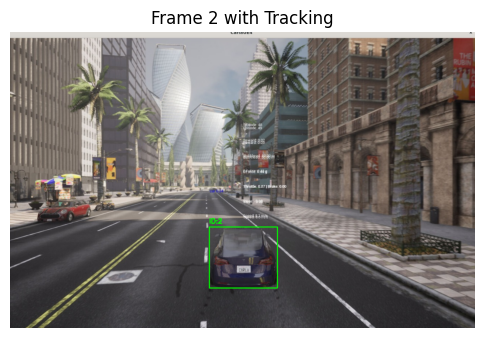

In [6]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(frame1_rgb)
ax[0].set_title("Frame 1")
ax[0].axis('off')

ax[1].imshow(frame2_rgb)
ax[1].set_title("Frame 2")
ax[1].axis('off')
plt.show()

# %% [markdown]
# ## Track objects across the two frames
# YOLOv8 has a `.track()` method that handles tracking.

# %%
# Track objects
results = model.track(source=[frame1, frame2], tracker="bytetrack.yaml", persist=True)

# %%
# Extract tracking results
for i, res in enumerate(results):
    print(f"\n--- Frame {i+1} ---")
    boxes = res.boxes
    for box in boxes.data.tolist():
        x1, y1, x2, y2, score, class_id, track_id = box
        print(f"Track ID {int(track_id)}: Class {int(class_id)}, BBox [{int(x1)}, {int(y1)}, {int(x2)}, {int(y2)}], Confidence {score:.2f}")

# %% [markdown]
# ## Visualize tracked objects
# Draw boxes with track IDs on images.

# %%
for i, res in enumerate(results):
    img = res.orig_img.copy()
    for box in res.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id, track_id = box
        x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
        cv2.putText(img, f"ID:{int(track_id)}", (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {i+1} with Tracking")
    plt.axis('off')
    plt.show()